In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Expedition Pré proc

In [23]:
# 1. Chargement du fichier
df = pd.read_csv('../RAW_data/expeditions.csv')

# 2. Aperçu des premières lignes
print("Aperçu du fichier :")
display(df.head())

# 3. Infos générales (types, NaNs...)
print("\nInfos sur les colonnes :")
display(df.info())

# 4. Suppression des doublons
df = df.drop_duplicates()

# 5. Affichage des valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
display(df.isnull().sum())

# 6. Suppression ou remplissage des valeurs manquantes
# Exemple : on remplit les colonnes numériques avec la moyenne
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Exemple : on remplit les colonnes catégorielles avec la valeur la plus fréquente
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 7. Vérification du nettoyage
print("\nAperçu après nettoyage :")
display(df.head())



Aperçu du fichier :


,id_expedition;id_commande;id_produit;quantite;entrepot;date_expedition;date_livraison;transporteur;cout_transport
0,SHP000001;O000001;P00527;6;Marseille;25/07/202...
1,SHP000002;O000002;P00336;5;Lyon;22/02/2024;27/...
2,SHP000003;O000004;P00887;8;Lyon;30/08/2024;31/...
3,SHP000004;O000006;P00810;6;Paris;03/06/2024;06...
4,SHP000005;O000007;P00154;4;Lyon;03/10/2024;09/...



Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42404 entries, 0 to 42403
Data columns (total 1 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   id_expedition;id_commande;id_produit;quantite;entrepot;date_expedition;date_livraison;transporteur;cout_transport  42404 non-null  object
dtypes: object(1)
memory usage: 331.4+ KB


None


Valeurs manquantes par colonne :


id_expedition;id_commande;id_produit;quantite;entrepot;date_expedition;date_livraison;transporteur;cout_transport    0
dtype: int64


Aperçu après nettoyage :


C:\Users\Jules\AppData\Local\Temp\ipykernel_1120\3086742500.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,id_expedition;id_commande;id_produit;quantite;entrepot;date_expedition;date_livraison;transporteur;cout_transport
0,SHP000001;O000001;P00527;6;Marseille;25/07/202...
1,SHP000002;O000002;P00336;5;Lyon;22/02/2024;27/...
2,SHP000003;O000004;P00887;8;Lyon;30/08/2024;31/...
3,SHP000004;O000006;P00810;6;Paris;03/06/2024;06...
4,SHP000005;O000007;P00154;4;Lyon;03/10/2024;09/...


In [24]:
# Vérifie s'il y a des doublons (lignes identiques)
duplicated_rows = df[df.duplicated()]

# Affiche le nombre de doublons
print(f"Nombre de lignes dupliquées : {duplicated_rows.shape[0]}")

# Affiche les lignes dupliquées si elles existent
if not duplicated_rows.empty:
    print("Voici les doublons :")
    display(duplicated_rows)
else:
    print("✅ Aucun doublon détecté.")

Nombre de lignes dupliquées : 0
✅ Aucun doublon détecté.


In [25]:
# 1. Affiche les colonnes catégorielles (object ou category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Colonnes catégorielles :")
print(list(cat_cols))

# 2. Affiche les valeurs uniques pour chaque colonne catégorielle
print("\nValeurs uniques par colonne catégorielle :")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("-" * 30)

Colonnes catégorielles :
['id_expedition;id_commande;id_produit;quantite;entrepot;date_expedition;date_livraison;transporteur;cout_transport']

Valeurs uniques par colonne catégorielle :

--- id_expedition;id_commande;id_produit;quantite;entrepot;date_expedition;date_livraison;transporteur;cout_transport ---
id_expedition;id_commande;id_produit;quantite;entrepot;date_expedition;date_livraison;transporteur;cout_transport
SHP042404;O050000;P00445;6;Lyon;02/08/2024;05/08/2024;DHL;10.37           1
SHP000001;O000001;P00527;6;Marseille;25/07/2024;29/07/2024;FedEx;33.08    1
SHP000002;O000002;P00336;5;Lyon;22/02/2024;27/02/2024;UPS;5.41            1
SHP000003;O000004;P00887;8;Lyon;30/08/2024;31/08/2024;FedEx;38.47         1
SHP042388;O049984;P00247;5;Lyon;27/06/2024;29/06/2024;FedEx;29.71         1
                                                                         ..
SHP000009;O000012;P00448;9;Lyon;12/12/2024;18/12/2024;UPS;5.68            1
SHP000008;O000011;P00919;3;Lyon;28/07/2024;0

In [26]:
# Pour une belle mise en forme des graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# 1. Colonnes catégorielles
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("🎯 Colonnes catégorielles :", list(cat_cols))

# 2. Affichage des valeurs uniques et graphiques barres
for col in cat_cols:
    print(f"\n🔸 {col} - Top catégories")
    print(df[col].value_counts().head(10))
    

🎯 Colonnes catégorielles : ['id_expedition;id_commande;id_produit;quantite;entrepot;date_expedition;date_livraison;transporteur;cout_transport']

🔸 id_expedition;id_commande;id_produit;quantite;entrepot;date_expedition;date_livraison;transporteur;cout_transport - Top catégories
id_expedition;id_commande;id_produit;quantite;entrepot;date_expedition;date_livraison;transporteur;cout_transport
SHP042404;O050000;P00445;6;Lyon;02/08/2024;05/08/2024;DHL;10.37           1
SHP000001;O000001;P00527;6;Marseille;25/07/2024;29/07/2024;FedEx;33.08    1
SHP000002;O000002;P00336;5;Lyon;22/02/2024;27/02/2024;UPS;5.41            1
SHP000003;O000004;P00887;8;Lyon;30/08/2024;31/08/2024;FedEx;38.47         1
SHP042388;O049984;P00247;5;Lyon;27/06/2024;29/06/2024;FedEx;29.71         1
SHP042387;O049983;P00186;5;Lyon;26/03/2024;29/03/2024;FedEx;26.15         1
SHP042386;O049982;P00040;3;Lyon;18/05/2024;20/05/2024;UPS;8.29            1
SHP042385;O049981;P00312;7;Paris;12/05/2024;18/05/2024;UPS;20.01          1

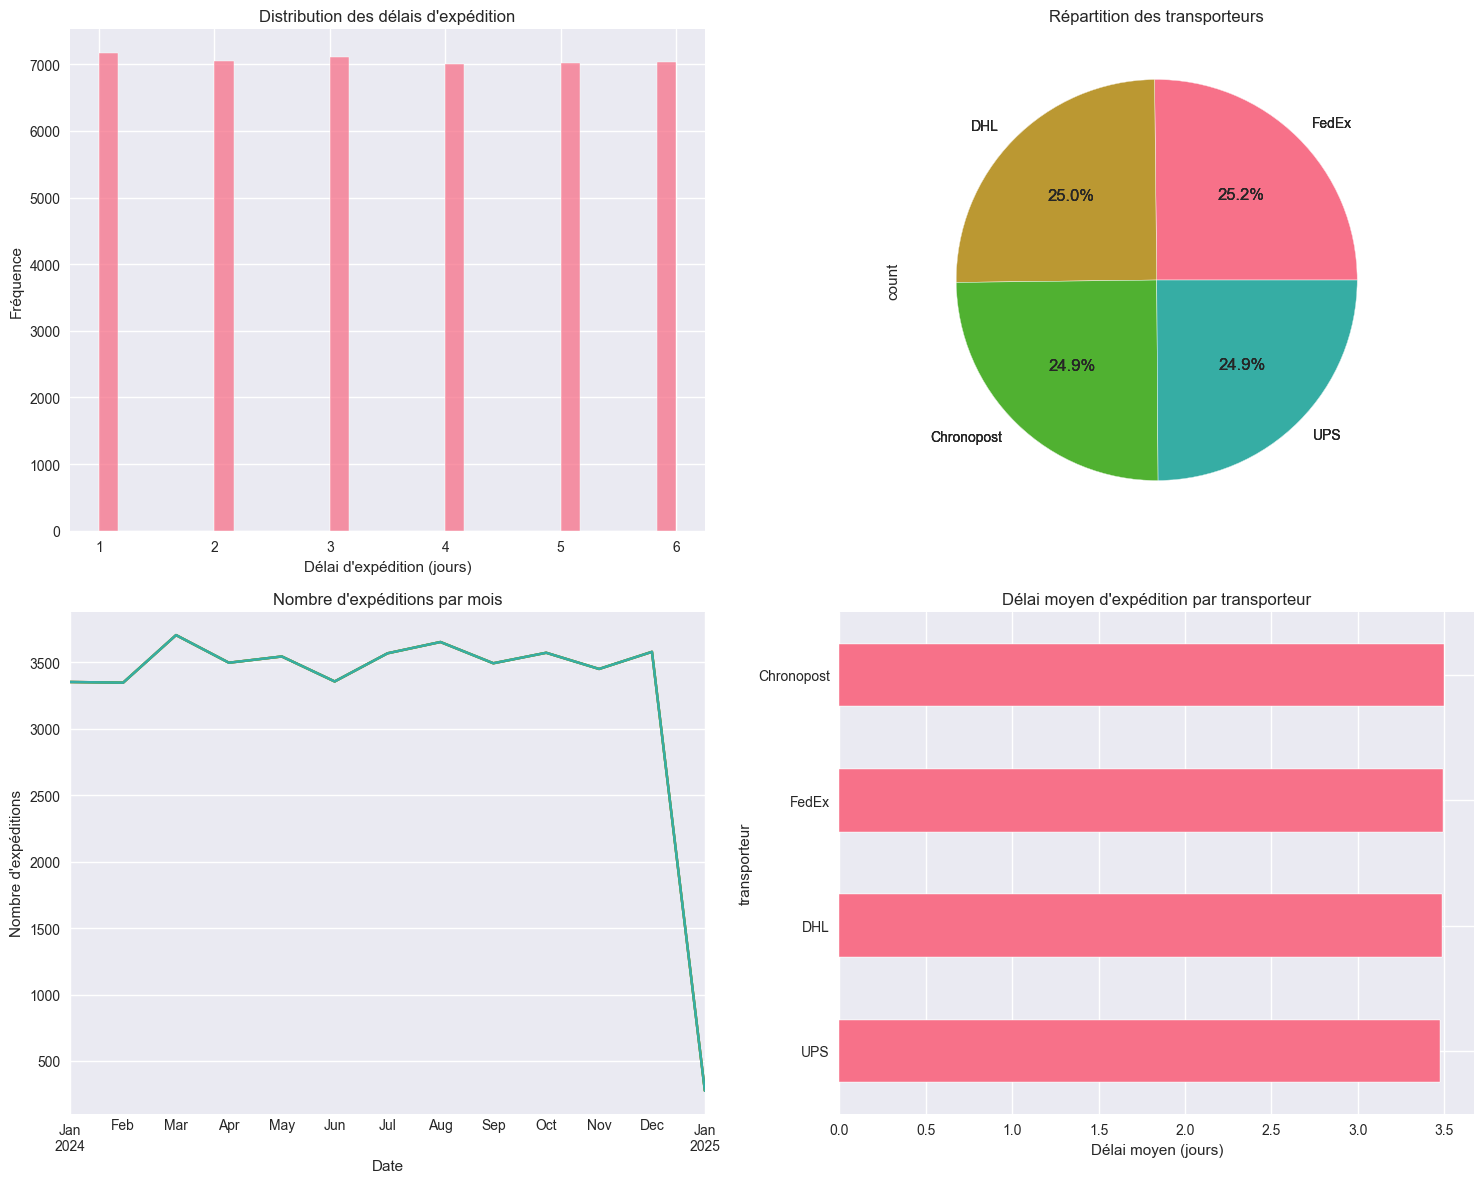

In [28]:
# Lecture du fichier des expéditions
df_expeditions = df  # Using the already loaded DataFrame from cell 2

# Configuration du style des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Séparation des colonnes
df_expeditions = df[df.columns[0]].str.split(';', expand=True)
# Séparation des colonnes
df_expeditions = df[df.columns[0]].str.split(';', expand=True)
df_expeditions.columns = ['id_expedition', 'id_commande', 'id_produit', 'quantite', 'entrepot', 
                         'date_expedition', 'date_livraison', 'transporteur', 'cout_transport']

# Calcul du délai d'expédition en jours
df_expeditions['date_expedition'] = pd.to_datetime(df_expeditions['date_expedition'], format='%d/%m/%Y')
df_expeditions['date_livraison'] = pd.to_datetime(df_expeditions['date_livraison'], format='%d/%m/%Y')
df_expeditions['delai_expedition'] = (df_expeditions['date_livraison'] - df_expeditions['date_expedition']).dt.days

# Conversion des types de données
df_expeditions['date_expedition'] = pd.to_datetime(df_expeditions['date_expedition'])
df_expeditions['delai_expedition'] = df_expeditions['delai_expedition'].astype(int)

# Création d'une figure avec 2x2 sous-graphiques
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution des délais d'expédition
sns.histplot(data=df_expeditions, x='delai_expedition', bins=30, ax=ax1)
ax1.set_title('Distribution des délais d\'expédition')
ax1.set_xlabel('Délai d\'expédition (jours)')
ax1.set_ylabel('Fréquence')

# 2. Statuts des expéditions
# 2. Répartition des transporteurs
transporteur_counts = df_expeditions['transporteur'].value_counts()
transporteur_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Répartition des transporteurs')

# 3. Evolution temporelle des expéditions
expeditions_mensuel = df_expeditions.groupby(df_expeditions['date_expedition'].dt.to_period('M')).size()
expeditions_mensuel.plot(kind='line', ax=ax3)
ax3.set_title('Nombre d\'expéditions par mois')
ax3.set_xlabel('Date')
ax3.set_ylabel('Nombre d\'expéditions')

# 4. Délai moyen d'expédition par transporteur
delai_moyen_transporteur = df_expeditions.groupby('transporteur')['delai_expedition'].mean().sort_values(ascending=True)
delai_moyen_transporteur.plot(kind='barh', ax=ax4)
ax4.set_title('Délai moyen d\'expédition par transporteur')
ax4.set_xlabel('Délai moyen (jours)')
# 2. Répartition des transporteurs
transporteur_counts = df_expeditions['transporteur'].value_counts()
transporteur_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Répartition des transporteurs')

# 3. Evolution temporelle des expéditions
expeditions_mensuel = df_expeditions.groupby(df_expeditions['date_expedition'].dt.to_period('M')).size()
expeditions_mensuel.plot(kind='line', ax=ax3)
ax3.set_title('Nombre d\'expéditions par mois')
ax3.set_xlabel('Date')
ax3.set_ylabel('Nombre d\'expéditions')

# 4. Délai moyen d'expédition par transporteur
delai_moyen_transporteur = df_expeditions.groupby('transporteur')['delai_expedition'].mean().sort_values(ascending=True)
delai_moyen_transporteur.plot(kind='barh', ax=ax4)
ax4.set_title('Délai moyen d\'expédition par transporteur')
ax4.set_xlabel('Délai moyen (jours)')
ax2.set_title('Répartition des statuts d\'expédition')

# 3. Evolution temporelle des expéditions
expeditions_mensuel = df_expeditions.groupby(df_expeditions['date_expedition'].dt.to_period('M')).size()
expeditions_mensuel.plot(kind='line', ax=ax3)
ax3.set_title('Nombre d\'expéditions par mois')
ax3.set_xlabel('Date')
ax3.set_ylabel('Nombre d\'expéditions')

# 4. Délai moyen d'expédition par statut
# 2. Répartition des transporteurs
transporteur_counts = df_expeditions['transporteur'].value_counts()
transporteur_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Répartition des transporteurs')

# 3. Evolution temporelle des expéditions
expeditions_mensuel = df_expeditions.groupby(df_expeditions['date_expedition'].dt.to_period('M')).size()
expeditions_mensuel.plot(kind='line', ax=ax3)
ax3.set_title('Nombre d\'expéditions par mois')
ax3.set_xlabel('Date')
ax3.set_ylabel('Nombre d\'expéditions')

# 4. Délai moyen d'expédition par transporteur
delai_moyen_transporteur = df_expeditions.groupby('transporteur')['delai_expedition'].mean().sort_values(ascending=True)
delai_moyen_transporteur.plot(kind='barh', ax=ax4)
ax4.set_title('Délai moyen d\'expédition par transporteur')
ax4.set_xlabel('Délai moyen (jours)')

plt.tight_layout()
plt.show()